# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

In [1]:
import sys
!{sys.executable} -m pip install qmsolve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt>?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

1. In quantum mechanics, a Hamiltonian is a representation of a systems total energy, and is one of the operators used in quantum mechanics 
(Sources:
  http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html ;
 https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_(Cline)/18%3A_The_Transition_to_Quantum_Physics/18.03%3A_Hamiltonian_in_Quantum_Theory)

2. The force law defined in the function <tt>harmonic_oscillator()</tt> is Hooke's Law, as k is being defined with the units eV over angstrom (Å) squared. The function then returns the potential energy (of spring), which is then used as an arbitrary potential to discretize the Hamiltonian.

3. Eigenstates within a dynamic, quantized system is in a state where a deterministic variable is fixed at a value, like a constant, with that set value tied to that particular eigenstate.
(Sources: 
 https://farside.ph.utexas.edu/teaching/qmech/Quantum/node40.html ;
 https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Introductory_Quantum_Mechanics_(Fitzpatrick)/03%3A_Fundamentals_of_Quantum_Mechanics/3.08%3A_Eigenstates_and_Eigenvalues)

4. The five plotted simple harmonic oscillator eigenstates are plotted the visualization of eigenstate zero of the simple harmonic oscillator.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.14140915870666504
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


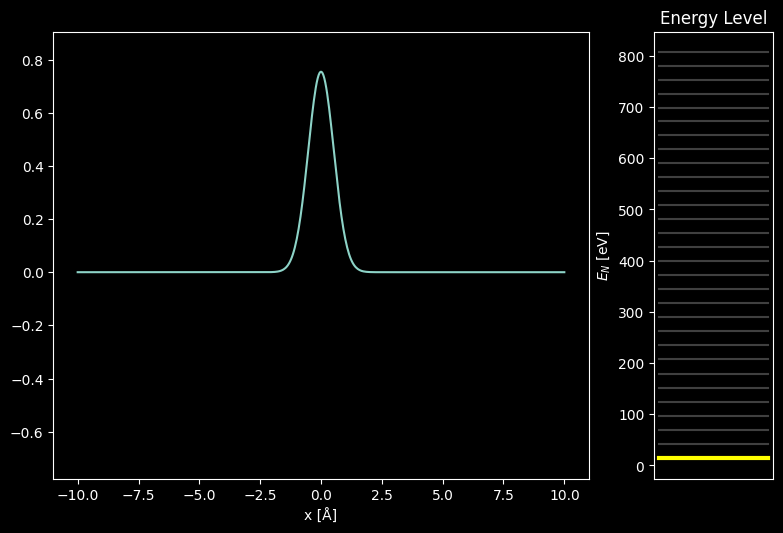

In [13]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

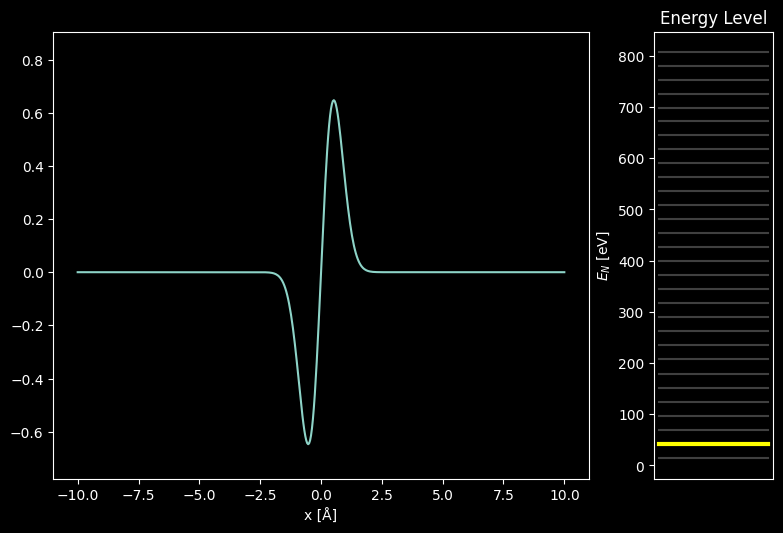

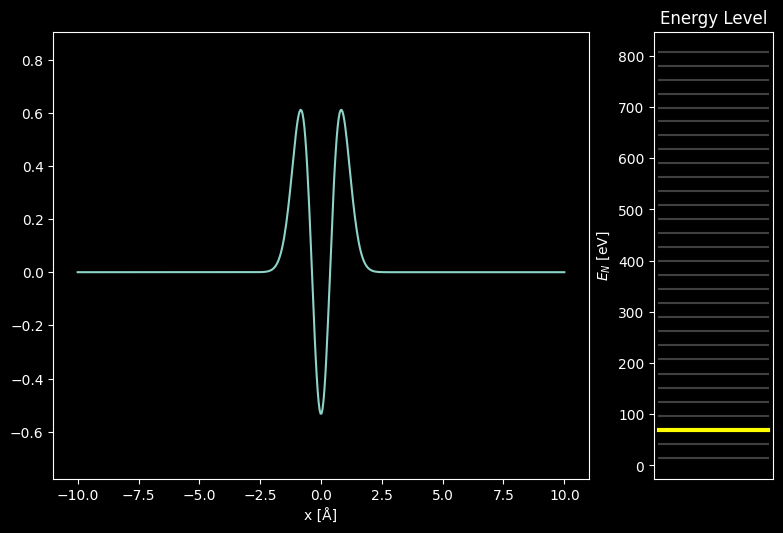

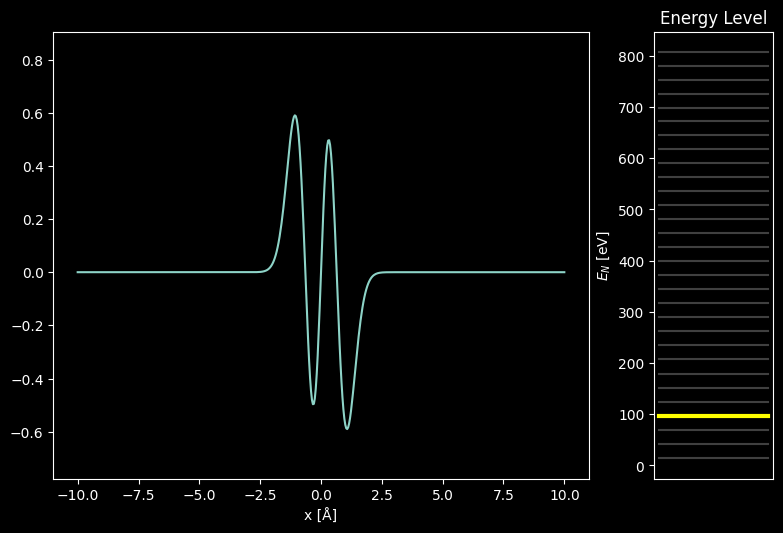

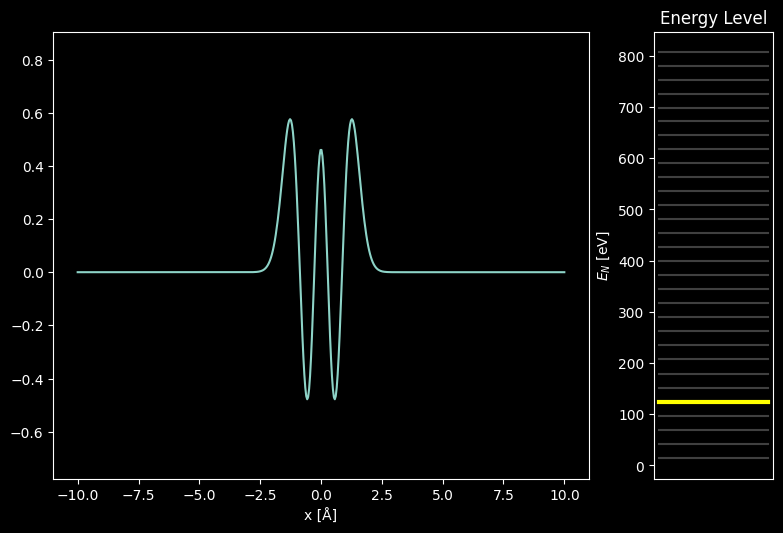

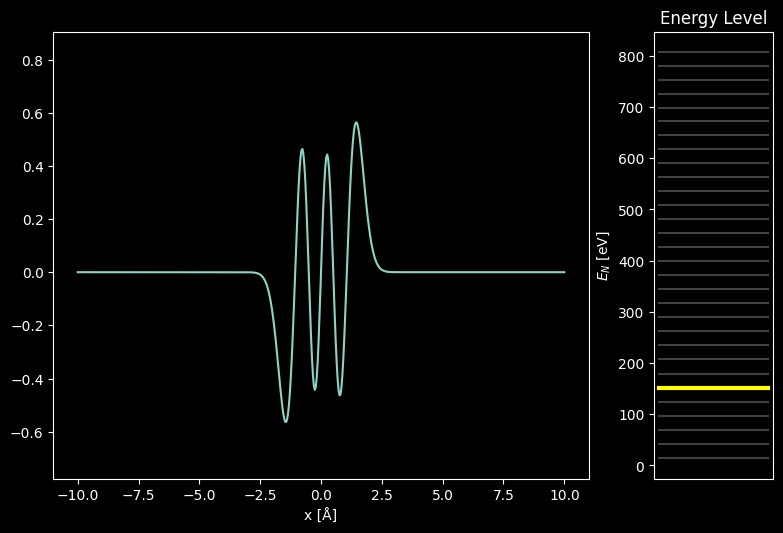

In [14]:
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(4)
visualization.plot_eigenstate(5)

5. The x-axis of my plots are in Angstrom (Å) (initially thought it was ampere, which doesn't make sense since x-axis is not plotting energy, but length, while y-axis is plotting energy in eV).

6. The plots are showing wave functions, as probability functions (which is the corresponding square of their wave functions) wouldn't have negative values on the y-axis of energy eV. For example, the probability function for eigenstate one would have two positives peaks, rather then one positive peak and a negative minimum. (Sources:
https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/07%3A_Quantum_Mechanics/7.02%3A_Wavefunctions)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Computing...
Took 0.43378543853759766
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


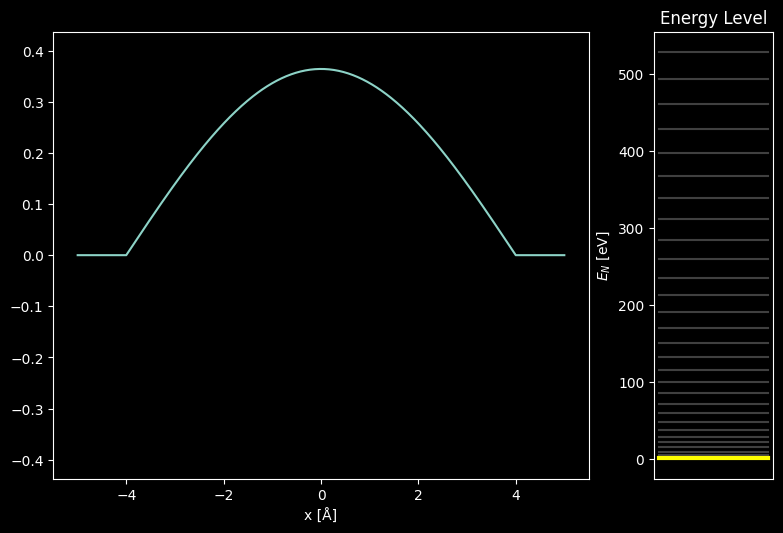

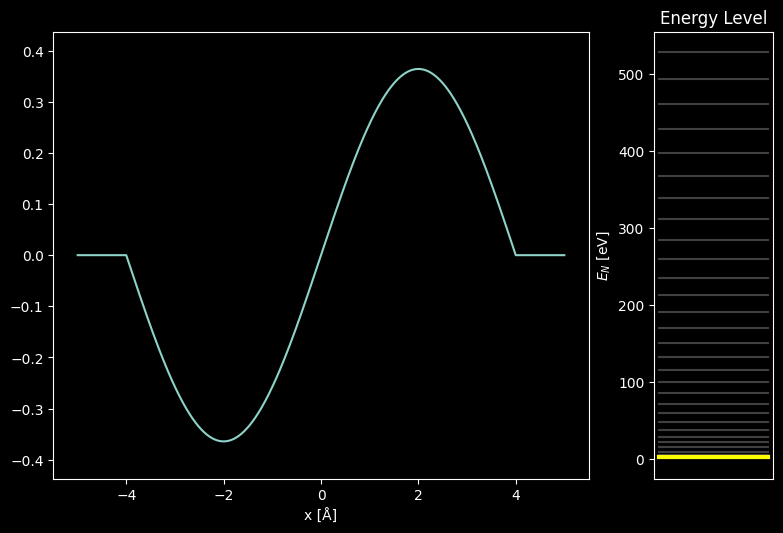

In [15]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

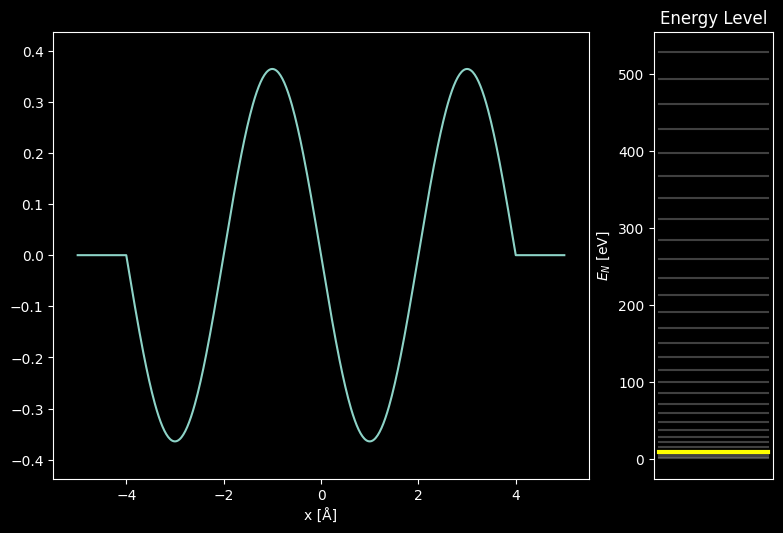

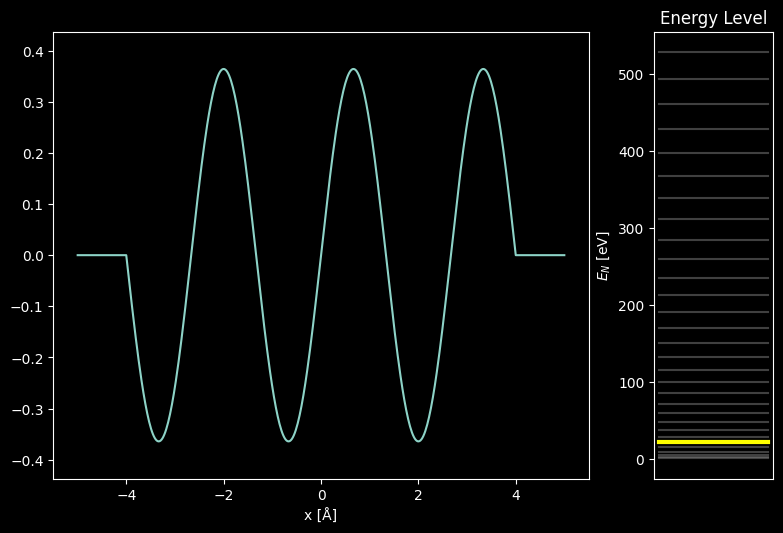

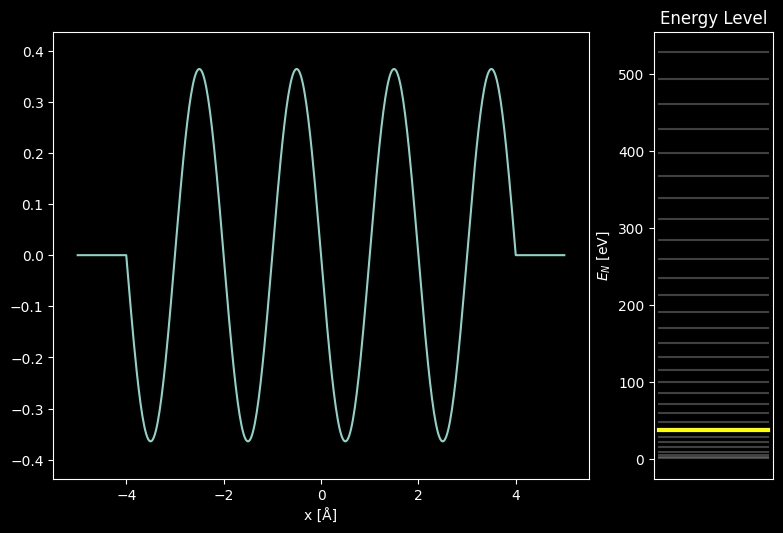

In [16]:
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(7)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class on 4/17)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

7. I've plotted the 3rd, 5th, and 7th lowest-energy eigenstates for this infinite square well above.

8. A property that infintite square well eigenstate have that's different than the simple harmonic oscillator is that is gives an unrealistic potential. This is due to an infinite potential not being possible because you would need an infinite energy. A infintite square well also works as an approximation to a one dimensional model, while a simple harmonic oscillator doesn't need to follow the same characteristics. (Sources: https://faculty.washington.edu/seattle/physics227/reading/reading-22-23.pdf)

9. The relationship between the number of extrema in each eigenstate plot and the quantum number of the eigenstate is that the number of extrema will be equal to the quantum number plus one. (Sources: https://physics.weber.edu/schroeder/quantum/SquareWell.pdf)

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

10. The code to create a finitie square-well potential is below, along with the plot of five eigenstates.

11. I think there is a probability for the particle to end up outside the finite square-well potential, not matter its quantum number. This is because the walls are not infinite, so there is a case where the particle can be enought energy to overcome these finite potential walls. Quantumly, when the energy of the particle is less then the energy of the potential well, this would be defined as quantum tunneling. (Sources: https://en.wikipedia.org/wiki/Finite_potential_well#:~:text=It%20is%20an%20extension%20of,being%20found%20outside%20the%20box.)

In [17]:
# Imports

from numpy import linspace, array,zeros,arange,append,nan
from scipy import linalg, tan,sqrt, pi,cos,sin,exp, optimize
import matplotlib.pyplot as plt

In [18]:
# Functions

def squ(x, args):
    u = zeros(len(x))
    width = args['width']
    depth = args['depth']
    for i in range(len(x)):
        if x[i] <= -width/2 or x[i] >= width / 2:
            u[i] = Vo
    return u

def e(x,theta0):
    y1 = tan(x)   
    y = sqrt((theta0/x)**2-1)
    return(y-y1)

def o(x,theta0):
    y2 = -1/tan(x)
    y = sqrt((theta0/x)**2-1)
    return(y-y2)

def finite(theta0,step):
    esol = array([], dtype=float)
    osol = array([], dtype=float)
    inc = arange(step,theta0,step)
    even = True
            
    for i in range(len(inc)-1):
        if even == True:
            if e(inc[i],theta0)*e(inc[i+1],theta0) < 0:                                                    
                esol = append(esol,optimize.brentq(e,inc[i],inc[i+1],args = theta0)) 
                even = False
        if even == False:
            if o(inc[i],theta0)*o(inc[i+1],theta0) < 0:
                osol = append(osol,optimize.brentq(o,inc[i],inc[i+1],args = theta0))
                even=True
    return esol,osol

def ewave(x,Vo,ek,ekap,L):
    A = Vo/20.
    B = A * (cos(ek*L/2)) / exp(-ekap*L/2)
    wave = zeros(len(x))
    for i in range(len(x)):
        if x[i] <= -L/2:
            wave[i] = B * exp(ekap*x[i])
        elif x[i] >= L/2:
            wave[i] = B * exp(-ekap*x[i])
        else:
            wave[i] = A * cos(ek*x[i])
    return wave

def owave(x,Vo,ok,okap,L):
    A= Vo/20.
    B= A * (sin(ok*L/2)) / exp(-okap*L/2)
    wave = zeros(len(x))
    for i in range(len(x)):
        if x[i] <= -L/2:
            wave[i] = B * exp(okap*x[i])
        elif x[i] >= L/2:
            wave[i]= -B * exp(-okap*x[i])
        else:
            wave[i] = -A * sin(ok*x[i])
    return wave

In [19]:
# Initial Conditions

m = .067
L = 10
Vo = 1
args = {'width': L, 'depth': Vo}
x = linspace(-2*L/2, 2*L/2,400)
U = squ(x,args)
theta0 = sqrt(m*9.31e-31*Vo*L*L/(2*(6.58e-16)**2*1e18*1.6e-19))

<ipython-input-19-bd4adcdd5a18>:9: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  theta0 = sqrt(m*9.31e-31*Vo*L*L/(2*(6.58e-16)**2*1e18*1.6e-19))


In [20]:
# Parameters

etheta, otheta = finite(theta0,.1)
ekap = 2*etheta/L*tan(etheta) 
okap = abs(2*otheta/L*tan(otheta))
ek = etheta*2./L
ok = otheta*2/L
eeng = 2*(1.05457173e-34)**2*etheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19 #even energy in eV
oeng = 2*(1.05457173e-34)**2*otheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19 #odd energy in eV


<ipython-input-18-9a5312ac6846>:13: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  y1 = tan(x)
<ipython-input-18-9a5312ac6846>:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y = sqrt((theta0/x)**2-1)
<ipython-input-18-9a5312ac6846>:18: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  y2 = -1/tan(x)
<ipython-input-18-9a5312ac6846>:19: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y = sqrt((theta0/x)**2-1)
<ipython-input-20-1e4b6ae634a7>:4: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  ekap = 2*etheta/L*tan(etheta)
<ipython-input-20-1e4b6ae634a7>:5: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  okap = abs(2*otheta/L*tan

<ipython-input-18-9a5312ac6846>:41: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  B = A * (cos(ek*L/2)) / exp(-ekap*L/2)
<ipython-input-18-9a5312ac6846>:41: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  B = A * (cos(ek*L/2)) / exp(-ekap*L/2)
<ipython-input-18-9a5312ac6846>:45: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  wave[i] = B * exp(ekap*x[i])
<ipython-input-18-9a5312ac6846>:49: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  wave[i] = A * cos(ek*x[i])
<ipython-input-18-9a5312ac6846>:47: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  wave[i] = B * exp(-ekap*x[i])
<ipython-input-18-9a5312ac6846>:54: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instea

Text(0, 0.5, 'V(x) (eV)')

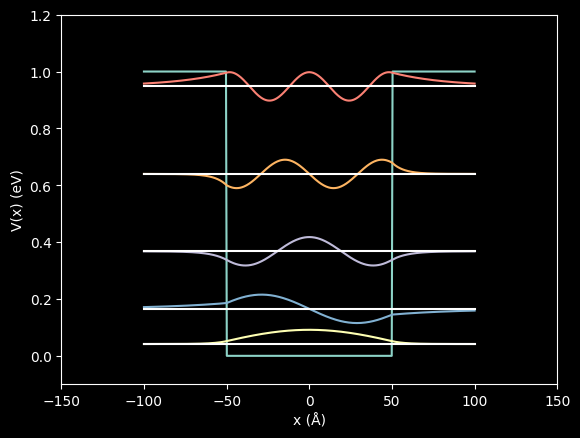

In [21]:
# Plotting

fig, ax = plt.subplots()

ax.plot(x*10, U)
for i in range(len(ek)): # plotting even waves
    ax.plot(x*10, eeng[i] + ewave(x,Vo,ek[i],ekap[i],L))
    ax.axhline(y = eeng[i], xmin = .1666, xmax = .8333)
for i in range(len(ok)): # plotting odd waves
    ax.plot(x*10, oeng[i] + owave(x,Vo,ok[i],okap[i],L))
    ax.axhline(y = oeng[i], xmin=  .1666, xmax = .8333)
    
ax.set_ylim(-.1*Vo, Vo*1.2)
ax.set_xlim((-3*L/2)*10, (3*L/2)*10)
ax.set_xlabel('x (Å)')
ax.set_ylabel('V(x) (eV)')